In [19]:
import torch
from models.jpeg import DiffJPEG
import cv2
import numpy as np

In [20]:
with torch.no_grad():
    img = cv2.imread("Lena.png")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    inputs = np.transpose(img, (2, 0, 1))
    inputs = inputs[np.newaxis, ...]

    tensor = torch.FloatTensor(inputs)
    jpeg = DiffJPEG(512, 512, differentiable=True)

    quality = 90
    jpeg.set_quality(quality)

    outputs = jpeg(tensor)
    outputs = outputs.detach()

In [21]:
tensor.max(), tensor.min(), tensor.shape

(tensor(242.), tensor(4.), torch.Size([1, 3, 512, 512]))

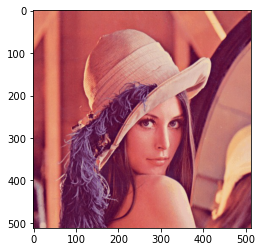

In [17]:
from torchvision.utils import save_image, make_grid
import matplotlib.pyplot as plt

plt.imshow(outputs[0].permute(1, 2, 0), vmin=0, vmax=255)

In [18]:
outputs = np.transpose(outputs[0], (1, 2, 0))

outputs = cv2.cvtColor(outputs, cv2.COLOR_RGB2BGR)

cv2.imshow("QF:"+str(quality), outputs / 255.)
cv2.waitKey()

from skimage.metrics import peak_signal_noise_ratio as PSNR
img = cv2.imread("Lena.png")
print(PSNR(np.uint8(outputs), np.uint8(img)))

error: OpenCV(4.5.2) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'
